In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('Data.csv')

In [3]:
#Section 1
#Spatial aggregation

state with highest average PM2.5: Delhi(104.1009176780069)


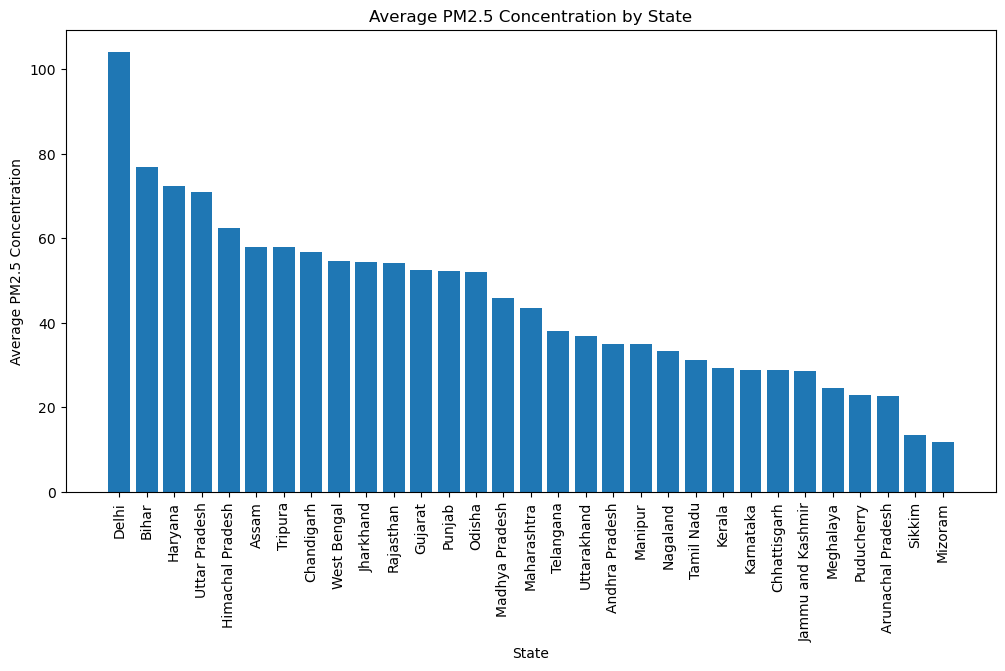

In [4]:
#Question-1
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('Data.csv')
pd.DataFrame(df)
df1=df.groupby('state')['PM2.5'].mean().sort_values(ascending=False)
print(f"state with highest average PM2.5: {df1.idxmax()}({df1.max()})")

plt.figure(figsize=(12, 6))
plt.bar(df1.index, df1.values)
plt.xticks(rotation=90)
plt.title('Average PM2.5 Concentration by State')
plt.xlabel('State')
plt.ylabel('Average PM2.5 Concentration')
plt.show()



state
Andhra Pradesh      2
Assam              22
Bihar             100
Delhi             470
Gujarat             4
Haryana            60
Jharkhand           1
Karnataka          14
Madhya Pradesh      8
Maharashtra        32
Odisha              1
Rajasthan          17
Tamil Nadu          3
Telangana           1
Tripura             1
Uttar Pradesh      55
dtype: int64


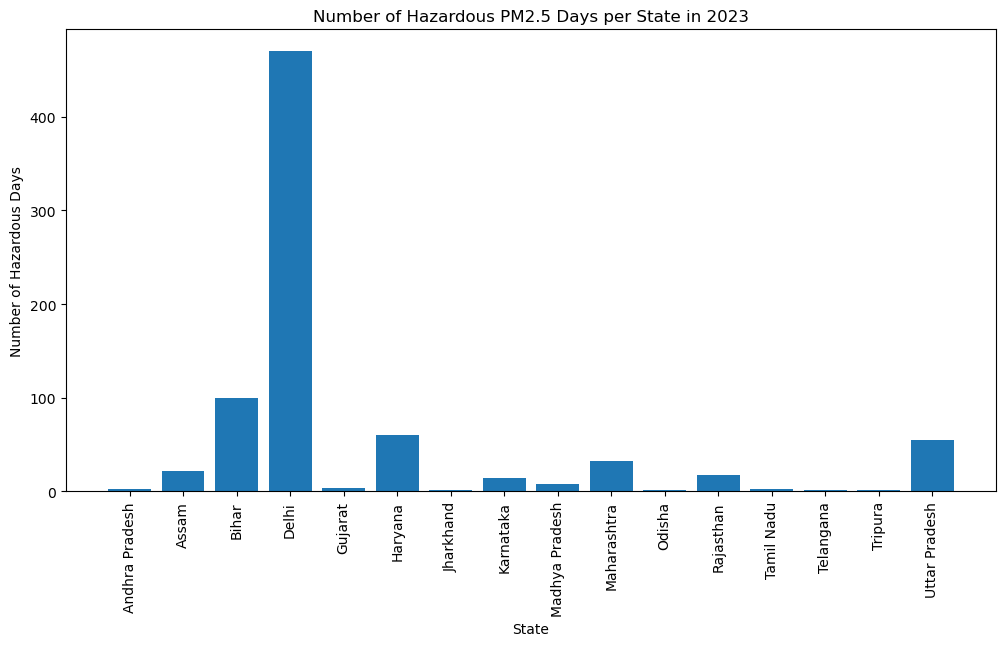

The state with most hazardous days in 2023: Delhi(470)


In [5]:
#Question-2
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format= '%Y-%m-%d')
df_2023 = df[df['Timestamp'].dt.year == 2023]
df_2023
mask= df_2023['PM2.5']> 300
filtered_2023= df_2023[mask]
filtered_2023
df2 = filtered_2023.groupby('state').size()
print(df2)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.bar(df2.index, df2.values)

plt.title('Number of Hazardous PM2.5 Days per State in 2023')
plt.xlabel('State')
plt.ylabel('Number of Hazardous Days')

plt.xticks(rotation=90)

plt.show()

# state with no. of days it had hazardous PM2.5 level in 2023.
print(f'The state with most hazardous days in 2023: {df2.idxmax()}({df2.max()})')




The average PM2.5 concentration on weekdays is 42.7898024449498 µg/m³
The average PM2.5 concentration on weekends is 41.1345804702066 µg/m³


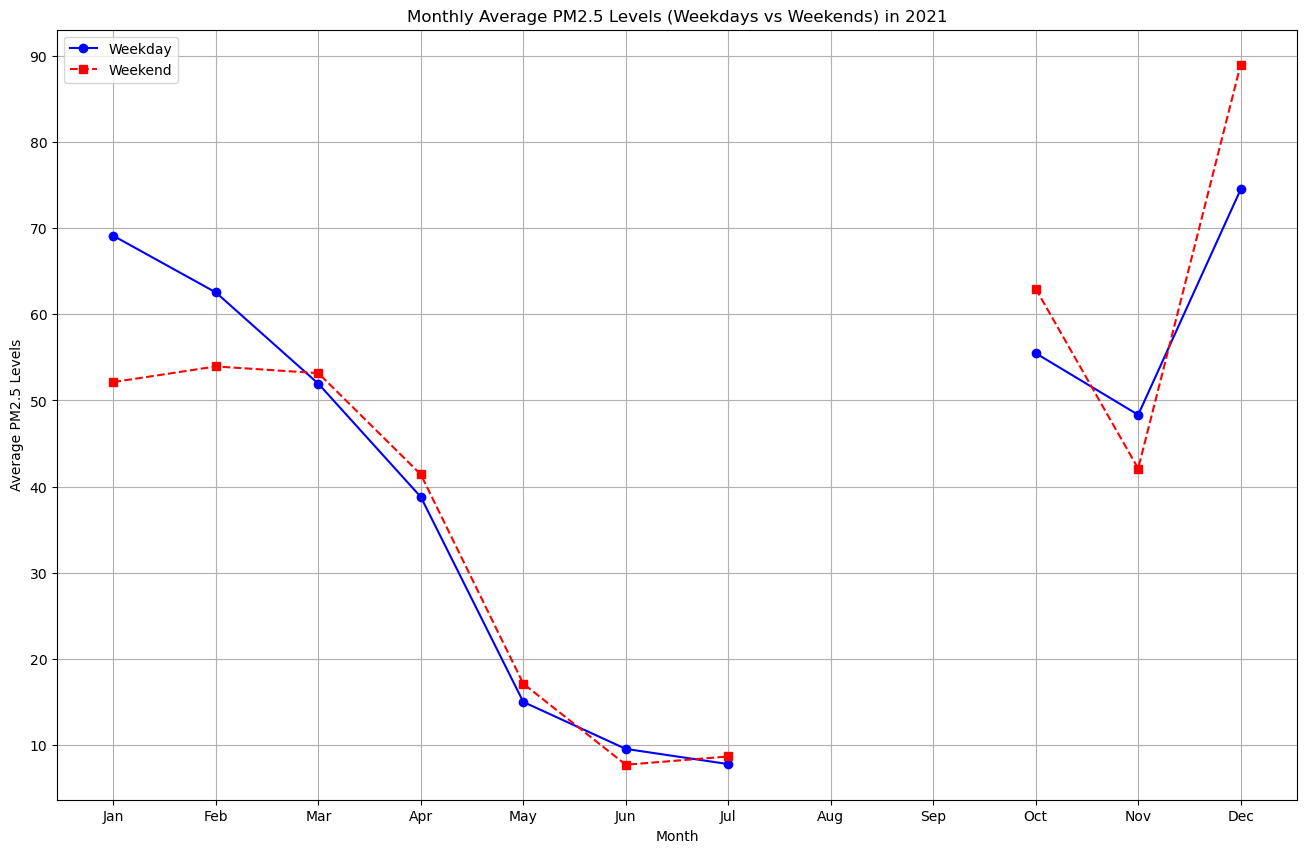

In [6]:
#Question 3
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

station_name = "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
df_station = df[(df["station"] == station_name) & (df["Timestamp"].dt.year == 2021)]

df_station = df_station.copy()
df_station["Month"] = df_station["Timestamp"].dt.month
df_station["Weekday"] = df_station["Timestamp"].dt.weekday
df_station["DayType"] = df_station["Weekday"].apply(lambda x: "Weekday" if x < 5 else "Weekend")

df_grouped = df_station.groupby(["Month", "DayType"])["PM2.5"].mean().unstack()

plt.figure(figsize=(16, 10))
plt.plot(df_grouped.index, df_grouped["Weekday"], marker='o', linestyle='-', label="Weekday", color='blue')
plt.plot(df_grouped.index, df_grouped["Weekend"], marker='s', linestyle='--', label="Weekend", color='red')

print(f"The average PM2.5 concentration on weekdays is {df_station[df_station['DayType'] == 'Weekday']['PM2.5'].mean()} µg/m³")
print(f"The average PM2.5 concentration on weekends is {df_station[df_station['DayType'] == 'Weekend']['PM2.5'].mean()} µg/m³")

plt.xlabel("Month")
plt.ylabel("Average PM2.5 Levels")
plt.title("Monthly Average PM2.5 Levels (Weekdays vs Weekends) in 2021")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid(True)
plt.show()

In [7]:
#Question 4
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format= '%Y-%m-%d')
df1 = df[df['Timestamp'].dt.year == 2020]
df2 = df[df['Timestamp'].dt.year == 2021]
df3= pd.DataFrame(pd.concat([df1, df2]))

df4=df3.groupby('state')['PM2.5'].mean()
b=df4.min()
df5=pd.DataFrame(df4)
df5.rename(columns={'PM2.5': 'Average PM2.5'}, inplace=True)
result= df5.loc[df5['Average PM2.5']==b]
print('State with the lowest average PM2.5 levels during the Covid period is:\n\n', result)

State with the lowest average PM2.5 levels during the Covid period is:

          Average PM2.5
state                 
Mizoram       14.32335


In [8]:
#Section 2
#Temporal Aggregation

In [9]:
#Question 1
start_time = '2020-08-01'
end_time = '2020-08-31'
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('Data.csv')
df1= pd.DataFrame(df)

df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
result = df1[(df1['Timestamp'] >= start_time) & (df1['Timestamp'] <= end_time)]
df_station=pd.DataFrame(result)

df_new=df_station.groupby('station')['PM2.5'].max()
final=pd.DataFrame(df_new)
a=final.max()
print(a)
#b=final.loc[final['PM2.5']==a]
#print('The station with highest value of PM 2.5 for the month Aug of 2020:\n\n', b)

PM2.5    805.51
dtype: float64


In [10]:
#Question 2
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format= '%Y-%m-%d')
df1 = df[df['Timestamp'].dt.year == 2018]
df2=df1.query('station== "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"')


winter= df2[(df2['Timestamp'].dt.month >= 12) | (df2['Timestamp'].dt.month <= 2)]
summer= df2[(df2['Timestamp'].dt.month >= 3) & (df2['Timestamp'].dt.month <= 5)]
monsoon= df2[(df2['Timestamp'].dt.month >= 6) & (df2['Timestamp'].dt.month <= 9)]

winter_mean= winter['PM2.5'].mean()
summer_mean= summer['PM2.5'].mean()
monsoon_mean= monsoon['PM2.5'].mean()

print(f"The average PM2.5 value in Winter is: {winter_mean}")
print(f"The average PM2.5 value in Summer is: {summer_mean}")
print(f"The average PM2.5 value in Monsoon is: {monsoon_mean}")

highest_mean = max(winter_mean, summer_mean, monsoon_mean)
if highest_mean == winter_mean:
    print("Winter has the highest average PM2.5 value.")
    print(winter)
elif highest_mean == summer_mean:
    print("Summer has the highest average PM2.5 value.")
    print(summer)
else:
    print("Monsoon has the highest average PM2.5 value.")
    print(monsoon)

print(f"The highest ave")



The average PM2.5 value in Winter is: 67.4923443634478
The average PM2.5 value in Summer is: nan
The average PM2.5 value in Monsoon is: 34.42519611317571
Winter has the highest average PM2.5 value.
        Timestamp                                        station      PM2.5  \
205010 2018-01-01  Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB        NaN   
205571 2018-01-02  Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB        NaN   
206132 2018-01-03  Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB        NaN   
206693 2018-01-04  Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB        NaN   
207254 2018-01-05  Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB        NaN   
...           ...                                            ...        ...   
406970 2018-12-27  Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB  51.007292   
407531 2018-12-28  Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB  54.107917   
408092 2018-12-29  Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB  66.530312   
408653 2018-

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Data.csv")
state_data = pd.read_csv("State_data.csv")
ncap = pd.read_csv("NCAP_Funding.csv")

state_data.rename(columns={'Area (km2)':'Area', 'State':'state'}, inplace=True)
ncap.rename(columns={'State':'state'}, inplace=True)

print(data.columns,'\n')

print(state_data.columns, '\n\n')

print(ncap.columns)

Index(['Timestamp', 'station', 'PM2.5', 'PM10', 'address', 'city', 'latitude',
       'longitude', 'state'],
      dtype='object') 

Index(['state', 'Population', 'Area'], dtype='object') 


Index(['S. No.', 'state', 'City', 'Amount released during FY 2019-20',
       'Amount released during FY 2020-21',
       'Amount released during FY 2021-22', 'Total fund released',
       'Utilisation as on June 2022'],
      dtype='object')


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import variation


df = pd.read_csv("Data.csv")
df
df_state=pd.read_csv("State_data.csv")

In [13]:
#Question 1:
data=pd.read_csv("Data.csv")
data["Timestamp"] = pd.to_datetime(data["Timestamp"])

df_2022 = data[data["Timestamp"].dt.year == 2022].copy()

df_2022["Month"] = df_2022["Timestamp"].dt.month
df_2022["Season"] = df_2022["Month"].apply(lambda x: "Summer" if x in [3, 4, 5] 
                                             else ("Monsoon" if x in [6, 7, 8, 9] 
                                                   else None))

state_season_avg = df_2022.groupby(["state", "Season"])["PM2.5"].mean().unstack()

state_season_avg["Percentage Change"] = ((state_season_avg["Monsoon"] - state_season_avg["Summer"]) / state_season_avg["Summer"]) * 100

most_difference_state = state_season_avg["Percentage Change"].abs().idxmax()
most_difference_value = state_season_avg.loc[most_difference_state, "Percentage Change"]

print(state_season_avg)
print(f"\nThe state with the highest difference is: {most_difference_state} with a percentage change of {most_difference_value:.2f}%.")

Season               Monsoon     Summer  Percentage Change
state                                                     
Andhra Pradesh     19.355510  30.128540         -35.756894
Arunachal Pradesh  15.069892  32.116292         -53.077110
Assam              21.872292  56.337647         -61.176419
Bihar              35.642356  75.834868         -53.000042
Chandigarh         32.758585  59.695914         -45.124242
Chhattisgarh       19.871696  22.321561         -10.975330
Delhi              42.769572  95.667628         -55.293579
Gujarat            35.852728  65.113078         -44.937747
Haryana            41.922458  81.727661         -48.704688
Himachal Pradesh   38.686133  61.471943         -37.067008
Jammu and Kashmir  18.049643  18.050196          -0.003063
Jharkhand                NaN        NaN                NaN
Karnataka          16.527449  33.387814         -50.498558
Kerala             28.852892  33.849203         -14.760499
Madhya Pradesh     22.473271  51.369364         -56.2516

<Figure size 1000x600 with 0 Axes>

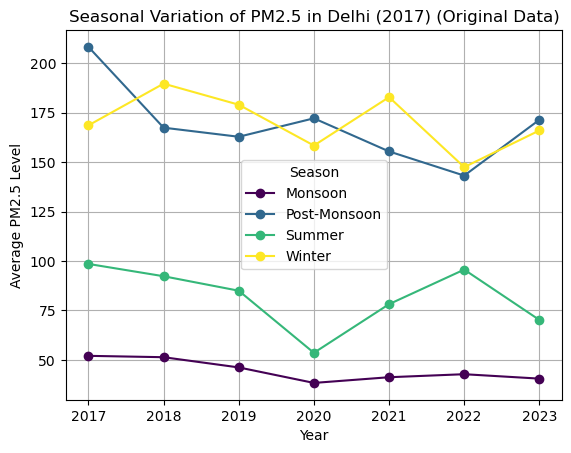

In [14]:
#Question 2:

df["Timestamp"] = pd.to_datetime(df['Timestamp'], format="%Y-%m-%d")
start_time = '2017-01-01'
end_time = '2023-12-31'

df1 = df[(df['Timestamp'] >= start_time) & (df['Timestamp'] <= end_time)]

df_delhi = df1[df1['city'] == "Delhi"].copy()

df_delhi['Year'] = df_delhi['Timestamp'].dt.year
df_delhi['Month'] = df_delhi['Timestamp'].dt.month

season_map = {
    'Winter': [12, 1, 2],
    'Summer': [3, 4, 5],
    'Monsoon': [6, 7, 8, 9]
}

df_delhi['Season'] = df_delhi['Month'].map(lambda x: next((s for s, m in season_map.items() if x in m), 'Post-Monsoon'))

seasonal_trends = df_delhi.groupby(['Year', 'Season'])['PM2.5'].mean().unstack()

plt.figure(figsize=(10, 6))
seasonal_trends.plot(marker='o', colormap='viridis')

plt.title("Seasonal Variation of PM2.5 in Delhi (2017) (Original Data)")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level")
plt.legend(title="Season")
plt.grid(True)
plt.show()



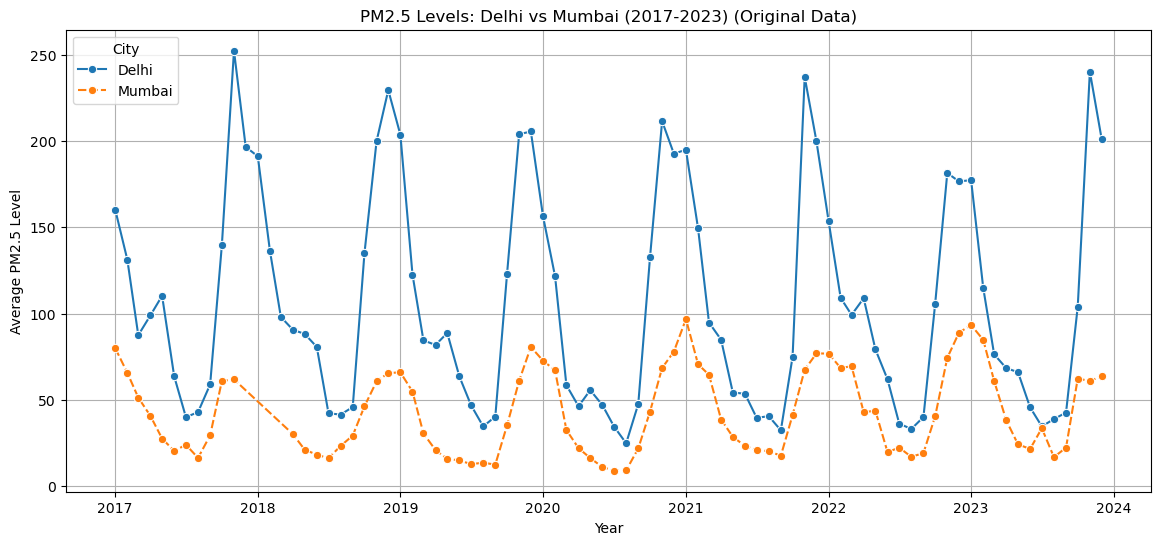

In [15]:
#Question 3:

df["Timestamp"] = pd.to_datetime(df['Timestamp'], format="%Y-%m-%d")
start_time = '2017-01-01'
end_time = '2023-12-31'

df1 = df[(df['Timestamp'] >= start_time) & (df['Timestamp'] <= end_time)]

df_cities = df1[df1['city'].isin(['Delhi', 'Mumbai'])].copy()

df_cities['Year'] = df_cities['Timestamp'].dt.year
df_cities['Month'] = df_cities['Timestamp'].dt.month

monthly_pm25 = df_cities.groupby(['Year', 'Month', 'city'])['PM2.5'].mean().reset_index()

monthly_pm25['Date'] = pd.to_datetime(monthly_pm25[['Year', 'Month']].assign(day=1))

pm25_pivot = monthly_pm25.pivot(index='Date', columns='city', values='PM2.5')

plt.figure(figsize=(14, 6))
sns.lineplot(data=pm25_pivot, marker="o")

plt.title("PM2.5 Levels: Delhi vs Mumbai (2017-2023) (Original Data)")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level")
plt.legend(title="City")
plt.grid(True)
plt.show()

In [16]:
#Section 4:

                state  Population  Num_Stations
0       Uttar Pradesh   199812341            57
1         Maharashtra   112374333            97
2               Bihar   104099452            36
3         West Bengal    91276115            22
4      Madhya Pradesh    72626809            29
5          Tamil Nadu    72147030            36
6           Rajasthan    68548437            46
7           Karnataka    61095297            42
8             Gujarat    60439692            17
9      Andhra Pradesh    49577103            13
10             Odisha    41974219            19
11          Telangana    35003674            14
12             Kerala    33406061             9
13          Jharkhand    32988134             4
14              Assam    31205576             9
15             Punjab    27743338             8
16       Chhattisgarh    25545198            14
17              Delhi    16787941            40
18            Haryana    25351462            30
19  Jammu and Kashmir    12267032       

C:\Users\parth\AppData\Local\Temp\ipykernel_10484\3258651318.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='Population', data=df_state.sort_values('Population', ascending=False).head(10), palette='Blues_r')


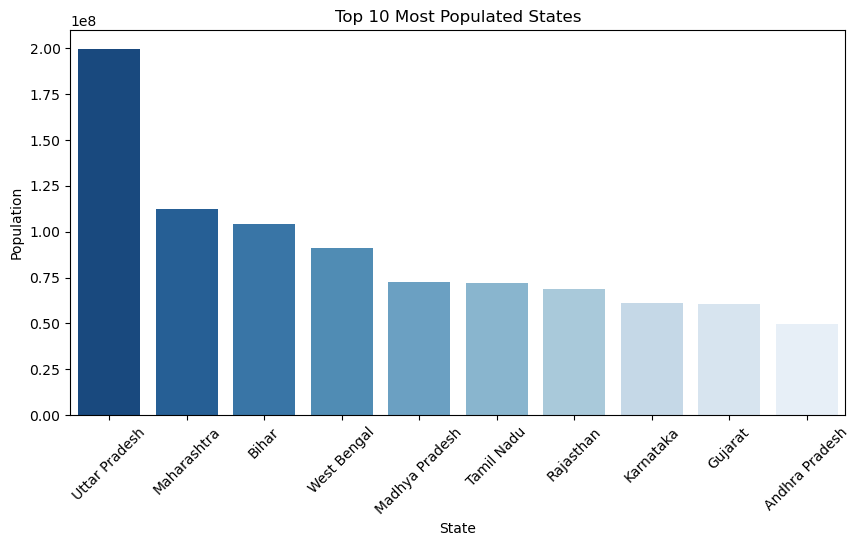

C:\Users\parth\AppData\Local\Temp\ipykernel_10484\3258651318.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='Num_Stations', data=df_state.sort_values('Num_Stations', ascending=False).head(10), palette='Greens_r')


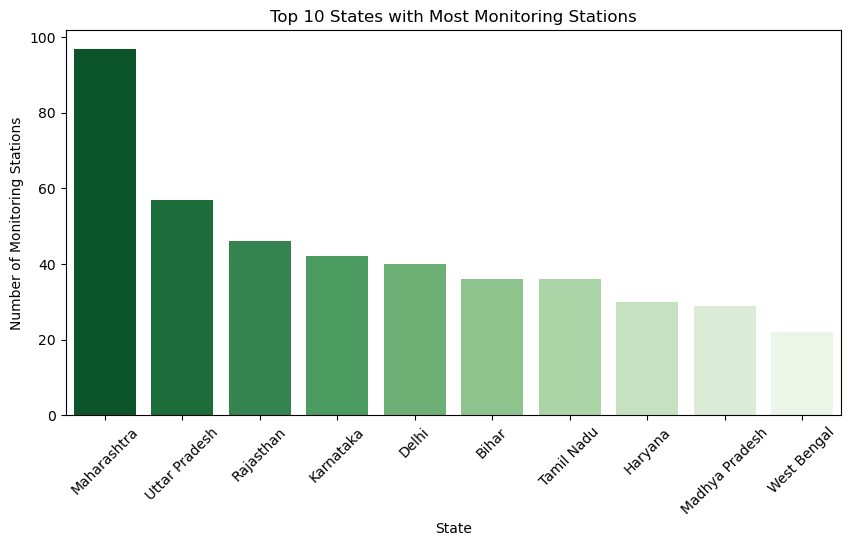

Conclusion: The number of monitoring stations does not always correlate with population size. Some states with smaller populations have a high number of stations, suggesting different monitoring strategies or pollution concerns.


In [17]:
#Question 1:

df["Timestamp"] = pd.to_datetime(df['Timestamp'], format="%d-%m-%Y")

station_counts = df.groupby('state')['station'].nunique().reset_index()
station_counts.columns = ['state', 'Num_Stations']

df_state.rename(columns={'State': 'state'}, inplace=True)

df_state = df_state.merge(station_counts, on='state', how='left')
df_state['Stations_per_million'] = df_state['Num_Stations'] / (df_state['Population'] / 1e6)
print(df_state[['state','Population','Num_Stations']])

most_monitored_state = df_state.loc[df_state['Stations_per_million'].idxmax()]
print("State with highest monitoring stations per million people:")
print(most_monitored_state[['state', 'Stations_per_million']])
print(most_monitored_state.dtype)

plt.figure(figsize=(10, 5))
sns.barplot(x='state', y='Population', data=df_state.sort_values('Population', ascending=False).head(10), palette='Blues_r')
plt.xticks(rotation=45)
plt.title('Top 10 Most Populated States')
plt.xlabel('State')
plt.ylabel('Population')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='state', y='Num_Stations', data=df_state.sort_values('Num_Stations', ascending=False).head(10), palette='Greens_r')
plt.xticks(rotation=45)
plt.title('Top 10 States with Most Monitoring Stations')
plt.xlabel('State')
plt.ylabel('Number of Monitoring Stations')
plt.show()

print("Conclusion: The number of monitoring stations does not always correlate with population size. Some states with smaller populations have a high number of stations, suggesting different monitoring strategies or pollution concerns.")


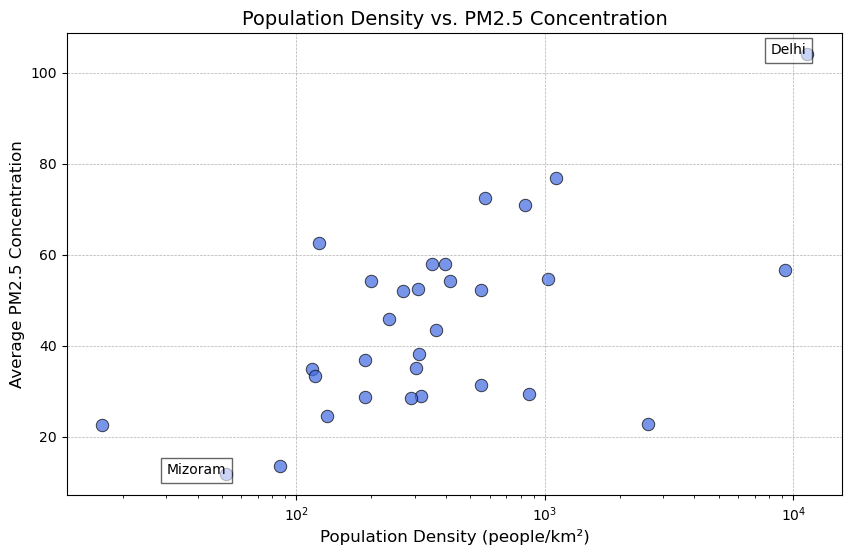

In [18]:
#Question 3:
df_copy = df.copy()

df_state['Population_Density'] = df_state['Population'] / df_state['Area (km2)']
state_pm25 = df_copy.groupby('state')['PM2.5'].mean().reset_index()
state_density_pm25 = df_state.merge(state_pm25, on='state', how='left')

state_density_pm25 = state_density_pm25.sort_values(by='PM2.5', ascending=False)


state_density_pm25 = state_density_pm25.replace([np.inf, -np.inf], np.nan).dropna(subset=['Population_Density', 'PM2.5'])


plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Population_Density', 
    y='PM2.5', 
    data=state_density_pm25, 
    color='royalblue', 
    edgecolor='black', 
    s=80, 
    alpha=0.7
)


top_state = state_density_pm25.iloc[0]  
low_state = state_density_pm25.iloc[-1] 

for state in [top_state, low_state]:
    plt.text(
        state['Population_Density'], state['PM2.5'], state['state'], 
        fontsize=10, ha='right', bbox=dict(facecolor='white', alpha=0.6, edgecolor='black')
    )

plt.xscale('log')  # Log scale for better separation
plt.title('Population Density vs. PM2.5 Concentration', fontsize=14)
plt.xlabel('Population Density (people/km²)', fontsize=12)
plt.ylabel('Average PM2.5 Concentration', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()

Top 5 states with highest PM2.5 exposure per capita in 2023:
        State      PM2.5  Population  Area (km2)  Per_Capita
0  Chandigarh  59.414055     1055450         114   56.292629
1      Sikkim  14.927530      610577        7096   24.448235
2     Tripura  80.469872     3673917       10491   21.903018
3  Puducherry  24.286078     1247953         479   19.460731
4    Nagaland  32.721157     1978502       16579   16.538349


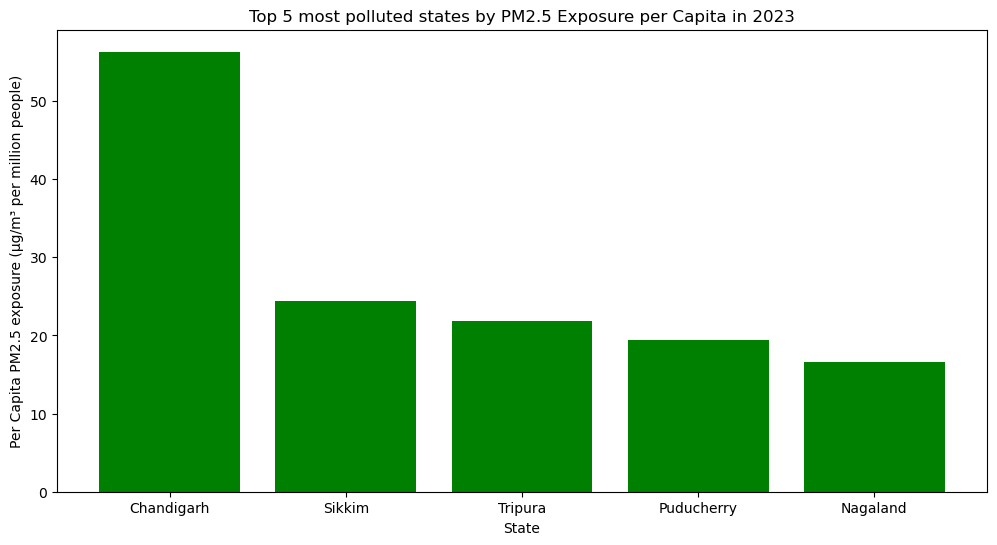

In [19]:
#Question 2:
state_data=pd.read_csv("State_data.csv")
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
data_2023 = data[data["Timestamp"].dt.year == 2023]

state_pm_25 = data_2023.groupby("state")["PM2.5"].mean().reset_index()
state_pm_25.columns = ["State", "PM2.5"]
state_pm_25 = state_pm_25.merge(state_data, on="State", how="left")
state_pm_25["Per_Capita"] = (state_pm_25["PM2.5"] / state_pm_25["Population"]) * 1000000

top5_states = state_pm_25.sort_values("Per_Capita", ascending=False).head(5).reset_index(drop=True)

print("Top 5 states with highest PM2.5 exposure per capita in 2023:")
print(top5_states)

plt.figure(figsize=(12, 6))
plt.bar(top5_states["State"], top5_states["Per_Capita"], color='g')
plt.xlabel("State")
plt.ylabel("Per Capita PM2.5 exposure (µg/m³ per million people)")
plt.title("Top 5 most polluted states by PM2.5 Exposure per Capita in 2023")
plt.grid(False)
plt.show()

## Question 3

In [21]:
population_df = state_data.eval('Population_density = Population / Area')[['state','Population_density']]
pm25_df = data.groupby('state')['PM2.5'].mean()
scatter_df = pd.merge(population_df, pm25_df, on='state')

print('''According to the graph the pollution levels seem to increase sharply with
increase in population density\n\n''')

markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', '+', 'x']
state_markers = {state: markers[i % len(markers)] for i, state in enumerate(scatter_df['state'])}

plt.figure(figsize=(8, 7))
for state in scatter_df['state']:
    subset = scatter_df[scatter_df['state'] == state]
    plt.scatter(subset['Population_density'], subset['PM2.5'], 
                label=state, marker=state_markers[state])
    
plt.xlabel("Population Density")
plt.ylabel("PM2.5 Concentration")
plt.title("Population Density vs PM2.5 Concentration by State")
plt.legend(title="State", bbox_to_anchor=(0.5, -0.2), loc="upper center", ncol=4)
plt.grid(True)
plt.tight_layout()
plt.show()


UndefinedVariableError: name 'Area' is not defined

# Area Based

## Question 1

In [ ]:
area1_df = pd.merge(data.groupby('state')['PM2.5'].mean(), state_data[['state','Area']], on='state')
area1_df['PM25_per_sqkm'] = area1_df['PM2.5']/area1_df['Area']

print("State with Highest PM2.5 per sqkm is:", area1_df.iloc[area1_df['PM25_per_sqkm'].idxmax()]['state'],'\n\n')
area1_df.plot.bar(x='state', y='PM25_per_sqkm', xlabel="States", ylabel="PM2.5 per sqkm")

## Question 2

In [ ]:
num_stations = data.groupby('state')['station'].nunique()
area2_df = pd.merge(num_stations ,state_data[['state','Area']], on='state')
area2_df['stations_per_sqkm'] = area2_df['station']/area2_df['Area']

print('State with Most number or stations per sqkm is:', area2_df.iloc[area2_df['stations_per_sqkm'].idxmax()]['state'],'\n\n')
area2_df.plot.bar(x='state',y='stations_per_sqkm', xlabel='States', ylabel='Stations per sqkm')

## Question 3

In [ ]:
area3_df = data[data['Timestamp'].str.startswith('2021')]
area3_MH_df = area3_df[area3_df['state']=='Maharashtra'][['Timestamp','PM2.5']].groupby('Timestamp')['PM2.5'].mean()
area3_MP_df = area3_df[area3_df['state']=='Madhya Pradesh'][['Timestamp','PM2.5']].groupby('Timestamp')['PM2.5'].mean()

print('''Despite having a higher population density, Maharashtra shows similar or even lower 
PM2.5 levels compared to Madhya Pradesh. This suggests that factors other than population
density may have a more significant impact on air pollution in these states.\n\n ''')

plt.figure(figsize=(10,6))
plt.plot(area3_MH_df, label='Maharashtra')
plt.plot(area3_MP_df, label='Madhya Pradesh')
plt.xticks(np.arange(1,365,31),["January", "February", "March", "April", "May",
"June","July", "August", "September", "October", "November", "December"], rotation=45)
plt.xlabel('Time')
plt.ylabel('PM2.5 Levels')
plt.legend()
plt.tight_layout()
plt.show()

# Funding Based

## Question 1

In [ ]:
fund1_df = pd.merge(ncap[['state','Amount released during FY 2021-22']], 
                    data[['state','PM2.5']], on='state')
mask = fund1_df['Amount released during FY 2021-22'] == '-'
states_without_fund = list(fund1_df[mask].groupby('state').groups.keys())

pm25_without_fund = fund1_df[fund1_df['state'].isin(states_without_fund)]['PM2.5'].mean()
pm25_with_fund = fund1_df[~(fund1_df['state'].isin(states_without_fund))]['PM2.5'].mean()

print(f'Average PM2.5 of states with NCAP funding in 2021: {pm25_with_fund:.2f}')
print(f'Average PM2.5 of states without NCAP funding in 2021: {pm25_without_fund:.2f}')
print('''\n\nAs we can see the states that received ncap funding 
had much higher PM2.5 levels on average''')

## Question 2

In [ ]:
state_A = data[data['state']=='Assam']['PM2.5']
plt.figure(figsize=(10,6))
plt.plot(list(state_A.index),state_A)
plt.xticks([])
plt.show()

## Question 3

In [ ]:
fund3_df = pd.merge(state_data[['state','Area']], ncap[['state','Total fund released']], on='state')


markers = ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
state_markers = {state: markers[i % len(markers)] for i, state in enumerate(fund3_df['state'])}

plt.figure(figsize=(10, 6))
for state in fund3_df['state'].unique():
    subset = fund3_df[fund3_df['state'] == state]
    plt.scatter(subset['Area'], subset['Total fund released'], 
                label=state, marker=state_markers[state], s=70)
    
plt.xlabel("Area (sqkm)")
plt.ylabel("Total NCAP Funding Received")
plt.title("Area vs NCAP Funding REceived")
plt.legend(title="State", bbox_to_anchor=(0.5, -0.2), loc="upper center", ncol=4)
plt.grid(True)
plt.show()



# Miscellaneous Questions 

## Question 1

In [ ]:
df_2023 = data[data['Timestamp'].str.startswith('2023')].copy()
most_polluted_city = df_2023.groupby('city')['PM2.5'].mean().idxmax()

num_days_above300 = (df_2023[df_2023['city']==most_polluted_city]['PM2.5'] > 300).sum()
total_days = len(df_2023[df_2023['city']==most_polluted_city]['PM2.5'] > 300)

percentage = num_days_above300 / total_days * 100
print(f'Percentage of days in city {most_polluted_city} with PM2.5 above 300 is: {percentage:.2f}%')

## Question 2

In [ ]:
from scipy.signal import find_peaks
delhi_df = data[(data['state']=='Delhi') & (data['Timestamp'].str.startswith(('2018','2019','2020')))].groupby('Timestamp')['PM2.5'].mean()

print("As we can see there seems to be more peaks in the highlighted in red Festival months\n\n")
plt.figure(figsize=(10,6))
plt.plot(list(delhi_df.index),delhi_df)
plt.axvspan(273, 364, color='red', alpha=0.4)
plt.axvspan(638, 729, color='red', alpha=0.4)
plt.axvspan(1003, 1094, color='red', alpha=0.4)
plt.show()



## Question 3

In [ ]:
state_with_highest_fund = ncap.groupby('state')['Amount released during FY 2020-21'].sum().idxmax()

print("State with highest funding:", state_with_highest_fund,'\n\n')
state_pm25 = data[data['state']==state_with_highest_fund]['PM2.5']
plt.figure(figsize=(10,6))
plt.plot(list(state_pm25.index),state_pm25)
plt.xticks([])
plt.show()

## Question 4

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(data["longitude"], data["latitude"])]
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")  # WGS 84 CRS

world = gpd.read_file("110m_cultural/ne_110m_admin_0_countries.shp")
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color="lightgrey", edgecolor="black")
gdf.plot(ax=ax, marker="o", color="red", markersize=100, label="Locations")

plt.legend()
plt.show()
